<a href="https://colab.research.google.com/github/Chichi213/Daiz_CPE-313/blob/main/Daiz_Hands_on_Activity_1_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = pd.read_csv("/content/drive/MyDrive/pima-indians-diabetes.csv")
filepath

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
filepath = "/content/drive/MyDrive/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
533,6,91,0,0,0,29.8,0.501,31,0
167,4,120,68,0,0,29.6,0.709,34,0
446,1,100,72,12,70,25.3,0.658,28,0
308,0,128,68,19,180,30.5,1.391,25,1
735,4,95,60,32,0,35.4,0.284,28,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 12)                108       
                                                                 
 dense_26 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6199 - accuracy: 0.6684 - val_loss: 0.6096 - val_accuracy: 0.6458
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6788 - val_loss: 0.5926 - val_accuracy: 0.6615
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6997 - val_loss: 0.5791 - val_accuracy: 0.6458
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7101 - val_loss: 0.5682 - val_accuracy: 0.6667
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7170 - val_loss: 0.5593 - val_accuracy: 0.6875
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7274 - val_loss: 0.5520 - val_accuracy: 0.6823
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7326 - val_loss: 0.5458 - val_accuracy: 0.6875
Epoch 8/200
1

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 0s 1ms/step


In [ ]:
y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 1ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.54680055],
       [0.55935943],
       [0.3156624 ],
       [0.29256752],
       [0.14578478],
       [0.52783585],
       [0.03926913],
       [0.35361868],
       [0.94557095],
       [0.25678018]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.755
roc-auc is 0.825


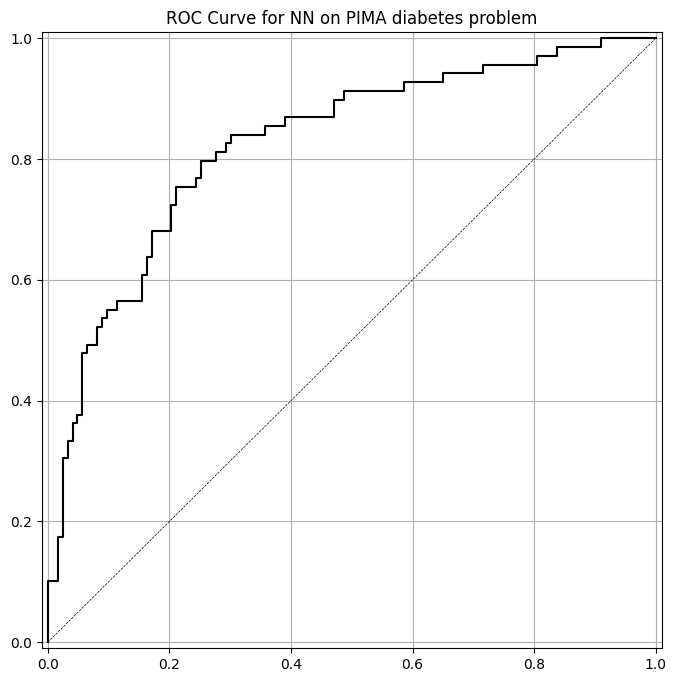

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')


- Based on the graph, since our ROC-AUC curve achieved an 82% prediction rate, this result can be considered as correctly classifying patients who have Pima diabetes and those who do not.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

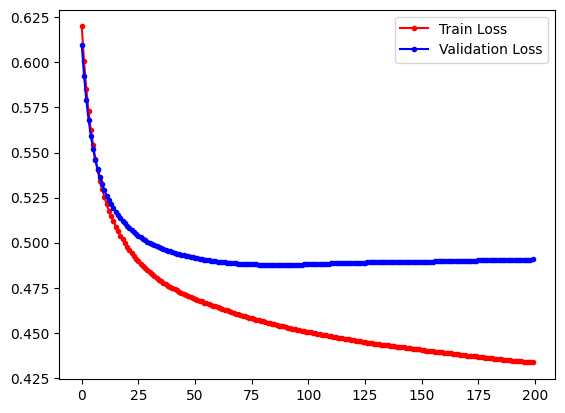

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- Based on the line graph, both the training and validation losses gradually decreased as the number of epochs increased, indicating that the model was performing well. However, there was a slight increase between 50 and 75 epochs, suggesting that overfitting occurred during training. Overall, the data performed well as the number of epochs increased.

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = df.iloc[:, :-1].values
y = df["Outcome"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model = Sequential([
        Dense(6, input_shape= (8,), activation="relu"),
        Dense(6, input_shape= (8,), activation="relu"),
        Dense(1, activation = 'sigmoid')]
)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 6)                 54        
                                                                 
 dense_28 (Dense)            (None, 6)                 42        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.8478 - accuracy: 0.3455 - val_loss: 0.8157 - val_accuracy: 0.3490
Epoch 2/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7981 - accuracy: 0.3385 - val_loss: 0.7755 - val_accuracy: 0.3698
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7628 - accuracy: 0.3819 - val_loss: 0.7472 - val_accuracy: 0.4062
Epoch 4/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.4392 - val_loss: 0.7266 - val_accuracy: 0.5052
Epoch 5/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.5087 - val_loss: 0.7112 - val_accuracy: 0.5260
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.5451 - val_loss: 0.6995 - val_accuracy: 0.5469
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5590 - val_loss: 0.6903 - val_accuracy: 0.5677
Epoch 

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.792
roc-auc is 0.825


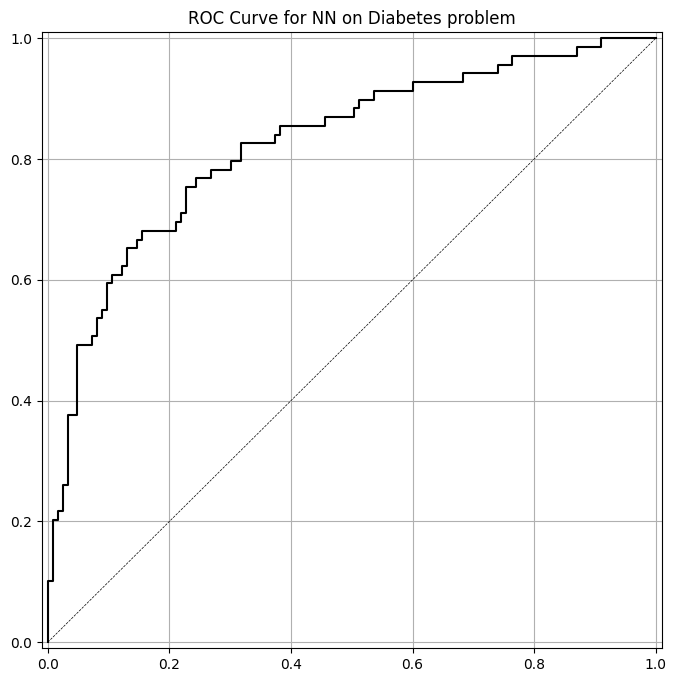

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Based on the graph, it performs well because it achieved of prediction of 82% in the AUC-ROC curve, meaning it correctly classifies patients who have and do not have diabetes.

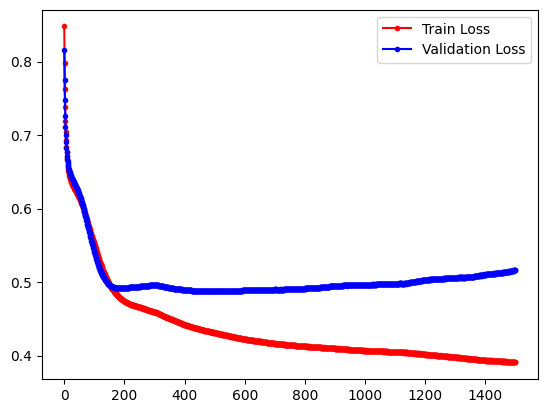

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()


- Here, I used a different dataset and adjusted the neural network; this time, it only has 6 nodes, which is much fewer compared to the procedure with 12 nodes. Based on the line graph, both the training and validation losses gradually decreased as the number of epochs increased meaning this dataset is performing well. However, the validation loss increased, indicating that the data was overfitted during training around 400 epochs.

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
#Creating Nueral Network with sigmoid and ReLu Activation Function
model2 = Sequential([
        Dense(6, input_shape= (8,), activation="relu"),
        Dense(6, input_shape= (8,), activation="relu"),
        Dense(6, input_shape= (8,), activation="relu"),
        Dense(1, activation = 'sigmoid')]
)

In [ ]:
model2.compile(SGD(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.7126 - accuracy: 0.4688 - val_loss: 0.7094 - val_accuracy: 0.5208
Epoch 2/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.4705 - val_loss: 0.7083 - val_accuracy: 0.5312
Epoch 3/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.4774 - val_loss: 0.7072 - val_accuracy: 0.5365
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4844 - val_loss: 0.7062 - val_accuracy: 0.5260
Epoch 5/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.4878 - val_loss: 0.7052 - val_accuracy: 0.5260
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4983 - val_loss: 0.7043 - val_accuracy: 0.5260
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.5365
Epoch 

In [ ]:
predict_x=model2.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 0s 1ms/step


In [ ]:
# checking if the model2 is greater than 0.5
y_pred_class_nn_2 = (model2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model2.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


accuracy is 0.724
roc-auc is 0.803


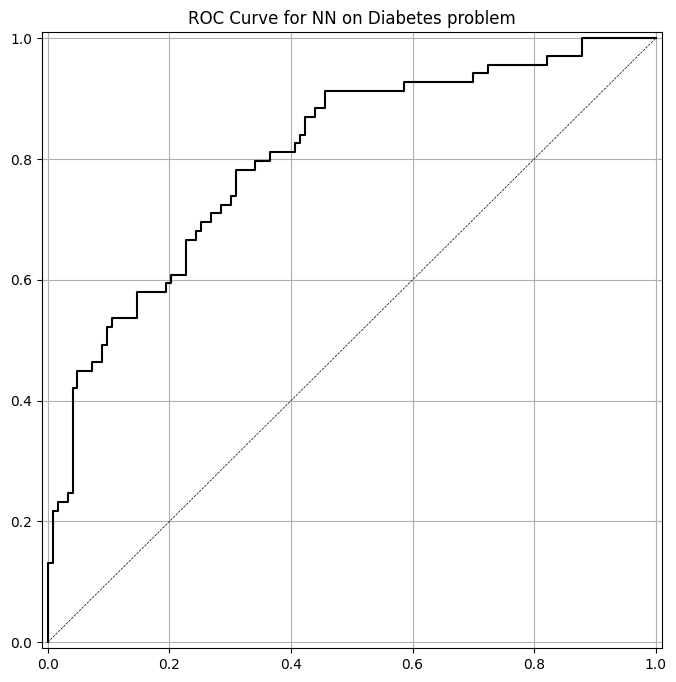

In [ ]:
# ROC-AUC Curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

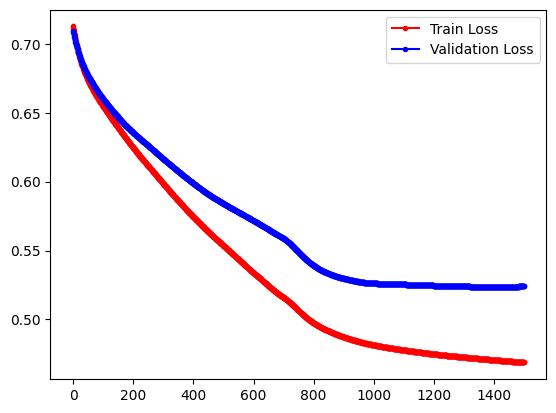

In [ ]:
# Plotting the training and validation Loss
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

- Here, I adjusted the neural network by adding more hidden layers with a learning rate of 0.001. Based on the line graph, both the training and validation losses gradually decreased as the number of epochs increased. However, the validation loss increased at 600 epochs, indicating that the data overfitted, but when it reached 800 epochs, it slightly decreased and became stable.

#### Conclusion

-
In this activity, we are tasked with performing a neural network and making adjustments. Based on what I observed from the procedure and supplementary activities, adjusting the neural network can improve its ability to learn relevant features of the data and optimize generalization to unseen data. However, making adjustments to neural networks requires training time that affects the performance of the data.